# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [65]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [66]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [67]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [68]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [69]:
# Extract all rows of data
table = soup.find('table', class_='table')
rows = table.find_all('tr')
# Initialize a list to store the table data
table_data = []

# Loop through each row to extract cell data
for row in rows:
    # Find all cells in the row (both <th> and <td>)
    cells = row.find_all(['th', 'td'])
    
    # Get the text from each cell and store it in a list
    row_data = [cell.get_text(strip=True) for cell in cells]
    
    # Add the row data to the table_data list
    table_data.append(row_data)

# Print the table data
for row in table_data:
    print(row)


['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', 

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [70]:
# Create an empty list

column_names = [
    'id', 'terrestrial_date', 'sol', 'ls', 
    'month', 'min_temp', 'pressure'
]
# Convert the scraped data into a Pandas DataFrame
# Use the first row as the column headers and the rest as data
columns = table_data[0]  # First row contains the column headings
data = table_data[1:]    # Remaining rows contain the data

# Create the DataFrame
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
print(df.head())

# Loop through the scraped data to create a list of rows


   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


In [71]:
# Confirm DataFrame was created successfully
print("Displaying the first 5 rows of the DataFrame:")
print(df.head())

Displaying the first 5 rows of the DataFrame:
   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [72]:
# Examine data type of each column
print("Current Data Types:")
print(df.dtypes)


Current Data Types:
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [73]:
# Change data types for data analysis
df['id'] = df['id'].astype(int)  # Convert to integer
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])  # Convert to datetime
df['sol'] = df['sol'].astype(int)  # Convert to integer
df['ls'] = df['ls'].astype(float)  # Convert to float
df['month'] = df['month'].astype(int)  # Convert to integer
df['min_temp'] = df['min_temp'].astype(float)  # Convert to float
df['pressure'] = df['pressure'].astype(float)  # Convert to float


In [74]:
# Confirm type changes were successful by examining data types again
print("\nData Types After Conversion:")
print(df.dtypes)
print("\nUpdated DataFrame:")
print(df.head())


Data Types After Conversion:
id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

Updated DataFrame:
   id terrestrial_date  sol     ls  month  min_temp  pressure
0   2       2012-08-16   10  155.0      6     -75.0     739.0
1  13       2012-08-17   11  156.0      6     -76.0     740.0
2  24       2012-08-18   12  156.0      6     -76.0     741.0
3  35       2012-08-19   13  157.0      6     -74.0     732.0
4  46       2012-08-20   14  157.0      6     -74.0     740.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [75]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print(f"There are {num_months} unique months on Mars.")

There are 12 unique months on Mars.


In [76]:
# 2. How many sols (Martian days) worth of data are there?
num_martian_days = len(df)
print(f"There are {num_martian_days} Martian days worth of data.")

There are 1867 Martian days worth of data.


In [77]:
# 3. What is the average minimum temperature by month?
avg_temp_per_month = df.groupby('month')['min_temp'].mean()
avg_temp_per_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [78]:
# Find the coldest and warmest months
coldest_month = avg_temp_per_month.idxmin()
warmest_month = avg_temp_per_month.idxmax()

# Print the coldest and warmest months
print(f"The coldest month is month {coldest_month} with an average temperature of {avg_temp_per_month.min()}°C.")
print(f"The warmest month is month {warmest_month} with an average temperature of {avg_temp_per_month.max()}°C.")

The coldest month is month 3 with an average temperature of -83.30729166666667°C.
The warmest month is month 8 with an average temperature of -68.38297872340425°C.


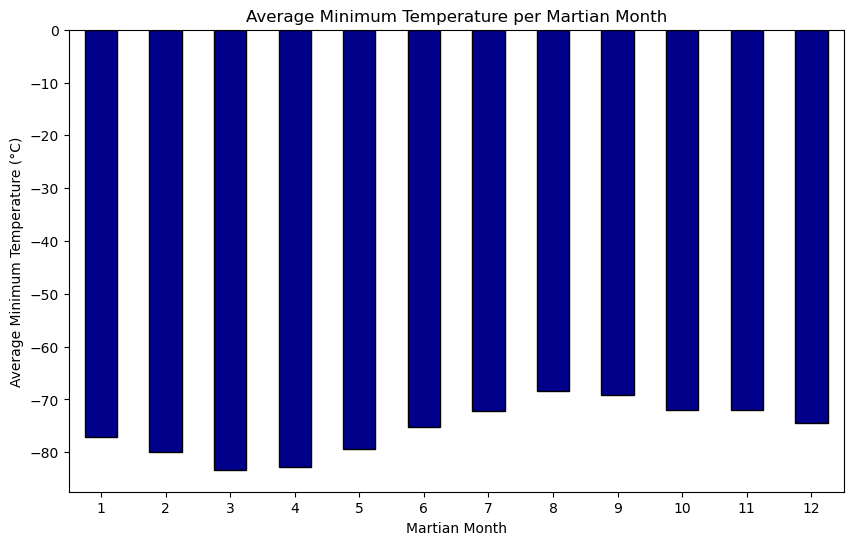

In [79]:
# Plot the average minimum temperature by month
avg_temp_per_month.plot(kind='bar', figsize=(10,6), color='darkblue', edgecolor='black')
plt.title('Average Minimum Temperature per Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)
plt.show()

The coldest month is month 3 with an average temperature of -83.30729166666667°C.
The hottest month is month 8 with an average temperature of -68.38297872340425°C.


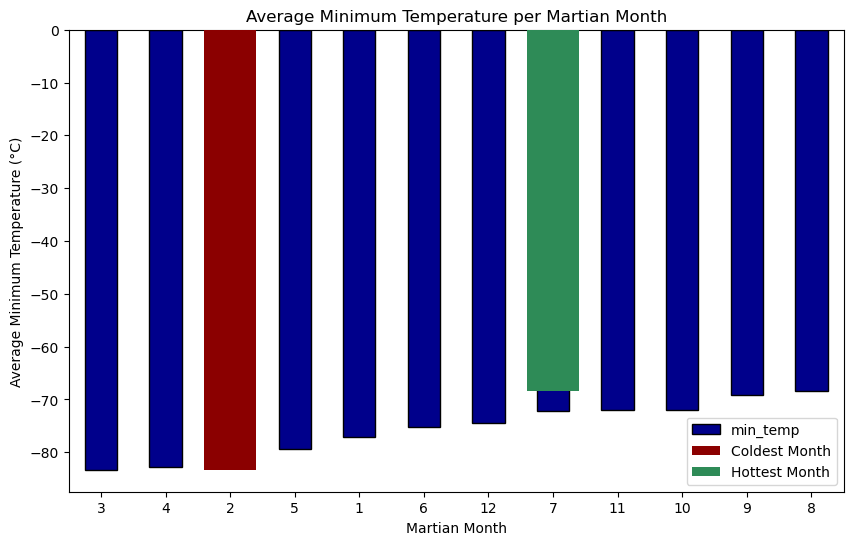

In [80]:

# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

# Sort the average temperature per month
sorted_avg_temp = avg_temp_per_month.sort_values()

# Identify the coldest and hottest months
coldest_month = sorted_avg_temp.idxmin()
hottest_month = sorted_avg_temp.idxmax()

# Print the coldest and hottest months
print(f"The coldest month is month {coldest_month} with an average temperature of {sorted_avg_temp.min()}°C.")
print(f"The hottest month is month {hottest_month} with an average temperature of {sorted_avg_temp.max()}°C.")

# Plot the average minimum temperature per month with highlighted coldest and hottest months
plt.figure(figsize=(10, 6))
sorted_avg_temp.plot(kind='bar', color='darkblue', edgecolor='black')

# Highlight the coldest and hottest months
plt.bar(coldest_month - 1, sorted_avg_temp.min(), color='darkred', label='Coldest Month', zorder=3)
plt.bar(hottest_month - 1, sorted_avg_temp.max(), color='seagreen', label='Hottest Month', zorder=3)

# Set plot title and labels
plt.title('Average Minimum Temperature per Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [81]:
# 4. What is the average pressure by month?
avg_pressure_per_month = df.groupby('month')['pressure'].mean()
avg_pressure_per_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

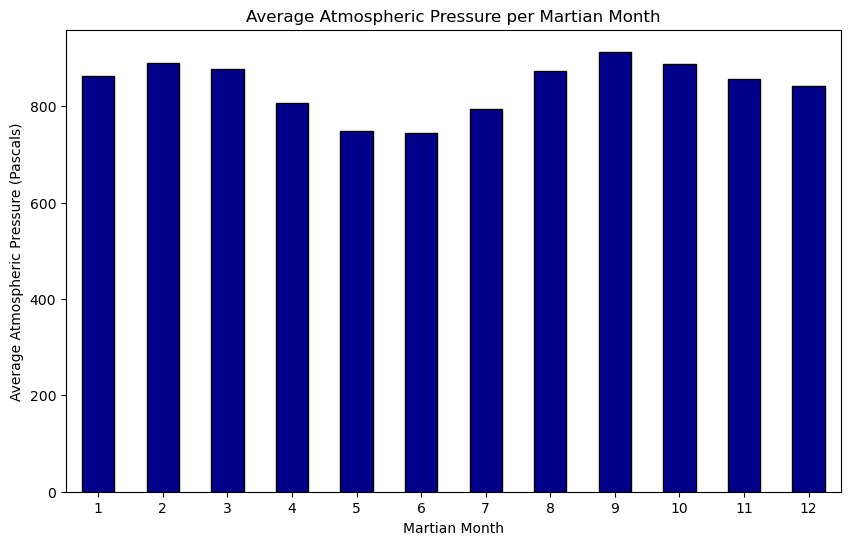

In [82]:
# Plot the average pressure by month
avg_pressure_per_month.plot(kind='bar', figsize=(10,6), color='darkblue', edgecolor='black')
plt.title('Average Atmospheric Pressure per Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Atmospheric Pressure (Pascals)')
plt.xticks(rotation=0)
plt.show()

The month with the lowest atmospheric pressure is month 6 with an average pressure of 745.0544217687075 Pascals.
The month with the highest atmospheric pressure is month 9 with an average pressure of 913.3059701492538 Pascals.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '6'),
  Text(1, 0, '5'),
  Text(2, 0, '7'),
  Text(3, 0, '4'),
  Text(4, 0, '12'),
  Text(5, 0, '11'),
  Text(6, 0, '1'),
  Text(7, 0, '8'),
  Text(8, 0, '3'),
  Text(9, 0, '10'),
  Text(10, 0, '2'),
  Text(11, 0, '9')])

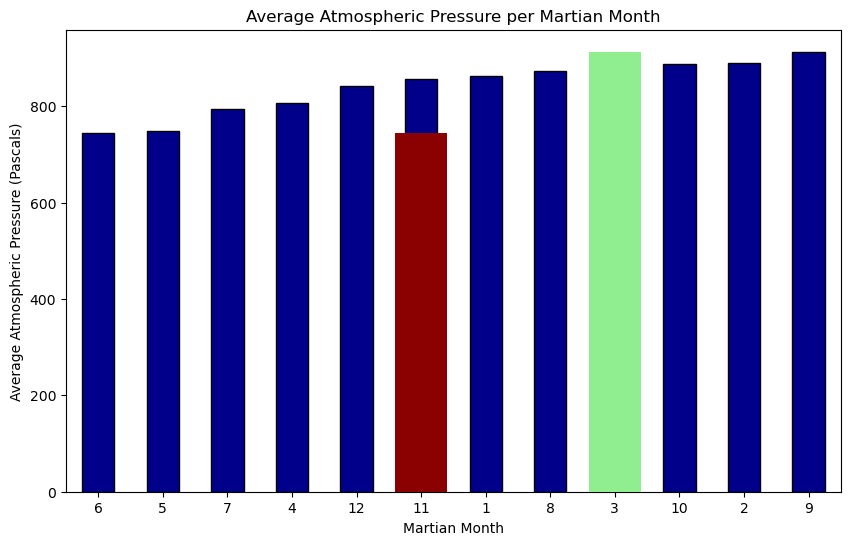

In [83]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure = avg_pressure_per_month.sort_values()

# Identify the months with the lowest and highest pressure
lowest_pressure_month = sorted_avg_pressure.idxmin()
highest_pressure_month = sorted_avg_pressure.idxmax()

# Print the lowest and highest pressure months
print(f"The month with the lowest atmospheric pressure is month {lowest_pressure_month} with an average pressure of {sorted_avg_pressure.min()} Pascals.")
print(f"The month with the highest atmospheric pressure is month {highest_pressure_month} with an average pressure of {sorted_avg_pressure.max()} Pascals.")

# Plot the average pressure per month with highlighted lowest and highest months
plt.figure(figsize=(10, 6))
sorted_avg_pressure.plot(kind='bar', color='darkblue', edgecolor='black')

# Highlight the lowest and highest pressure months
plt.bar(lowest_pressure_month - 1, sorted_avg_pressure.min(), color='darkred', label='Lowest Pressure', zorder=3)
plt.bar(highest_pressure_month - 1, sorted_avg_pressure.max(), color='lightgreen', label='Highest Pressure', zorder=3)

# Set plot title and labels
plt.title('Average Atmospheric Pressure per Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Atmospheric Pressure (Pascals)')
plt.xticks(rotation=0)

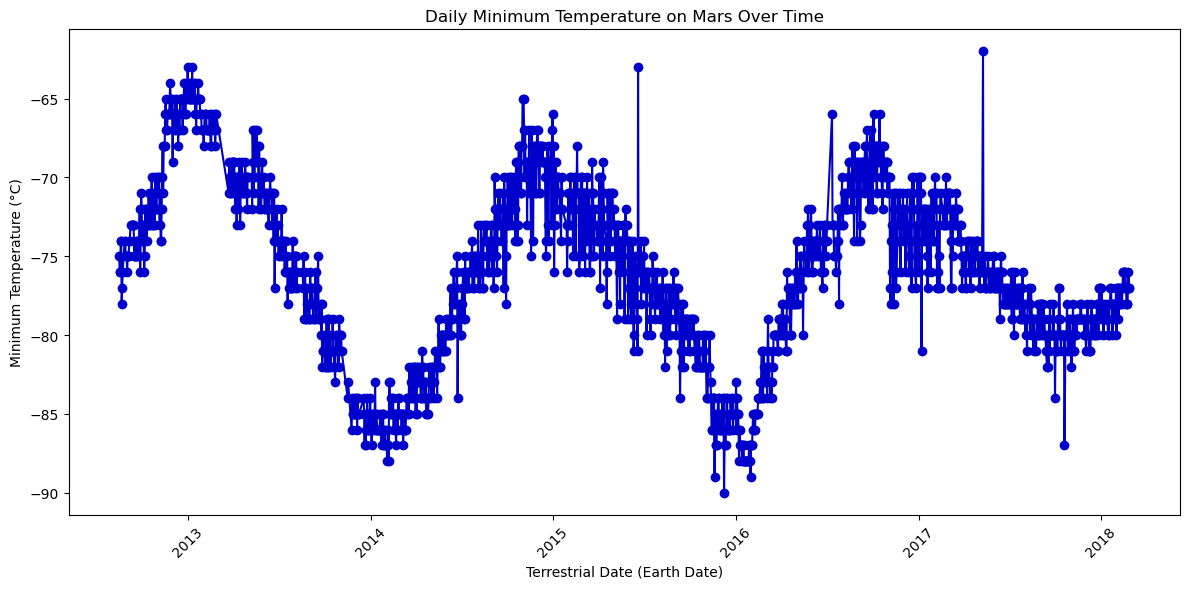

In [84]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

plt.figure(figsize=(12,6))
plt.plot(df['terrestrial_date'], df['min_temp'], marker='o', linestyle='-', color='mediumblue')
plt.title('Daily Minimum Temperature on Mars Over Time')
plt.xlabel('Terrestrial Date (Earth Date)')
plt.ylabel('Minimum Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Minimum Temperature

YOUR ANALYSIS HERE

In [85]:
# Analysis: Looking at the Bar Chart, we can conclude that althought the lowest temperature occures in 
#the 3rd month being -83.307292, on the Bar chart tyhe coldest month is 2nd month of the year.    

#### Atmospheric Pressure

YOUR ANALYSIS HERE

In [86]:
#Analysis: Looking at the results of calculations, we can see that The month with the lowest atmospheric pressure 
# is month 6 with an average pressure of 745.0544217687075 Pascals.
#The month with the highest atmospheric pressure is month 9 with an average pressure of 913.3059701492538 Pascals.

#At the same time, when we look the the bar chart, we see that the month with the lowest indicators of the pressure is month #11, 
# while the hishest is Month # 3

#### Year Length

YOUR ANALYSIS HERE

In [ ]:
#Analysis: 
#Looking at our graph for Daily minimum temperature over time, we can conclude that Martian year ai aproximately equal 
# to 2 years on Earth or 687 days as per calculations above.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [88]:
# Write the data to a CSV
file_path = 'mars_weather_data.csv'
df.to_csv(file_path, index=False)
print(f"Data has been successfully saved to {file_path}")

Data has been successfully saved to mars_weather_data.csv


In [89]:
browser.quit()